In [1]:
#necessary libraries
import librosa
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import tracks csv file for track_id and genre_top
tracks=pd.read_csv("./fma_metadata/tracks.csv", low_memory=False)

In [3]:
#all track ids start from index 2
id=tracks['Unnamed: 0'][2:]
id.head()

2     2
3     3
4     5
5    10
6    20
Name: Unnamed: 0, dtype: object

In [4]:
#labels for tracks start from index 2
genre=tracks['track.7'][2:]
genre.head()

2    Hip-Hop
3    Hip-Hop
4    Hip-Hop
5        Pop
6        NaN
Name: track.7, dtype: object

In [5]:
#change the track_id name to match fma_small filenames
count=2
for i in id:
    if len(i)==1:
        id[count]='00000'+i+'.mp3'
        count+=1
    elif len(i)==2:
        id[count]='0000'+i+'.mp3'
        count+=1
    elif len(i)==3:
        id[count]='000'+i+'.mp3'
        count+=1
    elif len(i)==4:
        id[count]='00'+i+'.mp3'
        count+=1
    elif len(i)==5:
        id[count]='0'+i+'.mp3'
        count+=1
#check if it worked
id.head()

2    000002.mp3
3    000003.mp3
4    000005.mp3
5    000010.mp3
6    000020.mp3
Name: Unnamed: 0, dtype: object

In [6]:
#describe genres by label number
dict_characters={0: 'Hip-Hop',1: 'Pop',2: 'Folk',3: 'Rock',4: 'Experimental',5: 'International',6: 'Instrumental',7: 'Electronic'}

In [ ]:
#load audio files and extract features
x=[] #will hold feature data
y=[] #will hold label data
path=os.path.abspath(os.path.join("./fma_small/"))
for subfolder in os.listdir(path):
    for filename in os.listdir(os.path.join(path,subfolder)):
        try:
            song, samp_rate=librosa.load(os.path.join(path,subfolder,filename), res_type='kaiser_fast')
            #extract mfcc feature from data
            #mfcc = mel-frequency cepstral coefficients
            #mfcc mimics the logarithmic perception of loudness and pitch of human auditory system and tries to eliminate speaker
            #dependent characteristics by excluding the fundamental frequency and their harmonics
            feature=np.mean(librosa.feature.mfcc(y=song, sr=samp_rate, n_mfcc=40).T, axis=0)
            x.append(feature)
            label=genre.loc[id == filename].values.tolist()
            if not label:
                label=genre.loc[id == filename[:6]].values.tolist()
            for key in dict_characters:
                if label[0] == dict_characters[key]:
                    y.append(key)
                    break
                elif not label:
                    y.append(8)
                    break
        except Exception as e:
            print("Error encountered for file: ", filename)

016880.mp3
['Hip-Hop']
016821.mp3
['Rock']
016820.mp3
['Rock']
016879.mp3
['Hip-Hop']
016162.mp3
['Hip-Hop']
016155.mp3
['Pop']
016095.mp3
['Pop']
016822.mp3
['Rock']
016338.mp3
['Pop']
016163.mp3
['Pop']
016337.mp3
['Pop']
016997.mp3
['Rock']
016158.mp3
['Pop']
016747.mp3
['International']
016334.mp3
['International']
016339.mp3
['Pop']
016994.mp3
['Rock']
016340.mp3
['Pop']
016744.mp3
['International']
016878.mp3
['Hip-Hop']
016895.mp3
['Pop']
016819.mp3
['Rock']
016995.mp3
['Rock']
016745.mp3
['International']
016354.mp3
['Rock']
016743.mp3
['International']
115852.mp3
['Experimental']
115923.mp3
['Folk']
115775.mp3
['Instrumental']
115700.mp3
['Electronic']
115765.mp3
['Rock']
115392.mp3
['Electronic']
115271.mp3
['International']
115699.mp3
['Electronic']
115273.mp3
['International']
115767.mp3
['Instrumental']
115267.mp3
['International']
115773.mp3
['Instrumental']
115722.mp3
['Electronic']
115850.mp3
['Experimental']
115761.mp3
['Rock']
115125.mp3
['Experimental']
115930.mp3
['

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/cc/.local/lib/python3.5/site-packages/audioread/gstdec.py", line 149, in run
    self.loop.run()
  File "/usr/lib/python3/dist-packages/gi/overrides/GLib.py", line 576, in run
    raise KeyboardInterrupt
KeyboardInterrupt



'107129.mp3'

In [21]:
label=['Experimental']
y=[]

In [22]:
#***THIS CODE SIMPLIFIES THE 8 IF/ELSE STATEMENTS FOR APPENDING LABEL DATA***#
for key in dict_characters:
    if label[0] == dict_characters[key]:
        y.append(key)
        break
    elif not label:
        y.append(8)
        break

In [23]:
y

[4]

In [8]:
#found out some files need to be located by full filename (xxxxxx.mp3) and others only respond without extension (xxxxxx)
label=genre.loc[id == '016819.mp3'].values.tolist()
label

['Rock']

In [7]:
#save x and y before splitting into train/test and before putting into DataFrame
#np.save('x.npy', x)
#np.save('y.npy', y)

In [153]:
#load the arrays
x=np.load('x.npy')
y=np.load('y.npy')

In [154]:
x=list(x)

In [155]:
#create the dataframe
df=pd.DataFrame()
df['songs']=x
df['labels']=y

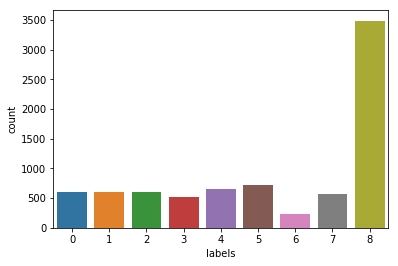

In [156]:
lab=df['labels']
dist=lab.value_counts()

#view the distribution of genres
import seaborn as sns
sns.countplot(lab)

In [159]:
#drop labels=8
df=df.drop(df[df['labels'] == 8].index)

In [165]:
#put x back to list
#*****REMEMBER: CONVERTING DATAFRAME TO NUMPY ARRAY FLATTENS THE DIMENSION TO 1, SO HAVE TO CONVERT BACK TO LIST FIRST*****#
x=list(df['songs'])

In [168]:
#check dimension of features after dropping labels=8
x=np.array(x)
print(x.shape)

(4510, 40)


In [169]:
#save new dataframe labels as y
y=df['labels']

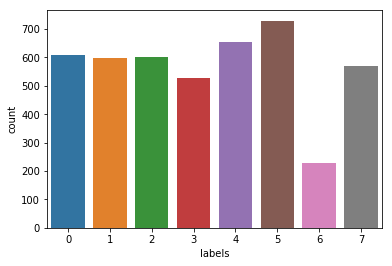

In [170]:
lab2=df['labels']
dist=lab.value_counts()

#view new distribution of genres
sns.countplot(lab2)

In [171]:
#view dimension of labels
print(y.shape)

(4510,)


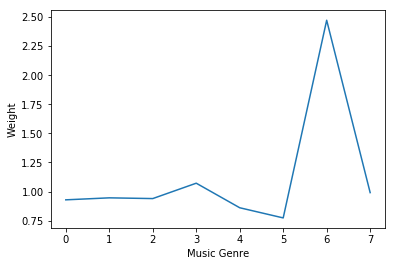

In [172]:
#balance the music genres 
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight('balanced', np.unique(y), y)
plt.plot(class_weight)
plt.xlabel('Music Genre')
plt.ylabel('Weight')

#save class_weights
np.save('class_weight.npy', class_weight)

In [175]:
#create training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#check the dimensions
print(x_train.shape)
print(x_test.shape)

(3157, 40)
(1353, 40)


In [176]:
#dummy code labels using one hot encoding
from keras.utils.np_utils import to_categorical

y_trainHot=to_categorical(y_train,num_classes=8)
y_testHot=to_categorical(y_test,num_classes=8)

/home/cc/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [177]:
#save variables using pickle
np.save('x_trainD.npy', x_train)
np.save('x_testD.npy', x_test)
np.save('y_trainD.npy', y_train) #not needed after this
np.save('y_testD.npy', y_test) #not needed after this
np.save('y_trainHotD.npy', y_trainHot)
np.save('y_testHotD.npy', y_testHot)

In [21]:
#****START HERE FOR RUNNING ON YOUR OWN MACHINES****#
#load the variables using pickle
x_train=np.load('x_trainD.npy')
x_test=np.load('x_testD.npy')
y_trainHot=np.load('y_trainHotD.npy')
y_testHot=np.load('y_testHotD.npy')

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [178]:
# Helper Functions, Learning Curves, and Confusion Matrix
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pylab as plt

#save all previous epochs for use in plotting Keras Learning Curve
#this is used in function below called plotKerasLearningCurve
class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

#Keras Learning Curve function
def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    
#Confuson Matrix function
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [179]:
#deep learning libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.optimizers import Adam
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [180]:
#****EDIT THIS FOR TRYING DIFFERENT MODELS****#

#deep learning model
#a = x_train
#b = y_trainHot
#c = x_test
#d = y_testHot
#e = number of epochs
def runCNNmodel(a,b,c,d,e):
    batch=32
    num_labels=8
    filter_size=2 #what is filter size?
    #intialize model
    model=Sequential()
    
    #visible layers
    model.add(Dense(256,input_shape=(40,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    #hidden layers
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    #8 output nodes
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    
    #compile the model
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

    #train the model
    model.fit(a,b,batch_size=batch,epochs=e,validation_data=(c,d),callbacks=[MetricsCheckpoint('logs')], class_weight=class_weight)
    
    #compute predictions for confusion matrix
    Y_pred = model.predict(c)
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(Y_pred, axis=1),target_names=list(dict_characters.values())), sep='')
    Y_pred_classes = np.argmax(Y_pred,axis = 1)
    Y_true = np.argmax(d,axis = 1)
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
    
    #plot confusion matrix
    plot_confusion_matrix(cm=confusion_mtx,classes=list(dict_characters.values()))

Train on 3157 samples, validate on 1353 samples
Epoch 1/1000
3157/3157 [==============================] - 1s 213us/step - loss: 11.3566 - acc: 0.1771 - val_loss: 7.4722 - val_acc: 0.2801
Epoch 2/1000
3157/3157 [==============================] - 0s 141us/step - loss: 7.6574 - acc: 0.2309 - val_loss: 2.3196 - val_acc: 0.3082
Epoch 3/1000
3157/3157 [==============================] - 0s 140us/step - loss: 3.1546 - acc: 0.2116 - val_loss: 1.9978 - val_acc: 0.2092
Epoch 4/1000
3157/3157 [==============================] - 0s 135us/step - loss: 2.2473 - acc: 0.2132 - val_loss: 2.0095 - val_acc: 0.2409
Epoch 5/1000
3157/3157 [==============================] - 0s 139us/step - loss: 2.0524 - acc: 0.2401 - val_loss: 1.9645 - val_acc: 0.2417
Epoch 6/1000
3157/3157 [==============================] - 0s 142us/step - loss: 1.9706 - acc: 0.2512 - val_loss: 1.9145 - val_acc: 0.2668
Epoch 7/1000
3157/3157 [==============================] - 0s 140us/step - loss: 1.9384 - acc: 0.2597 - val_loss: 1.8670 - v

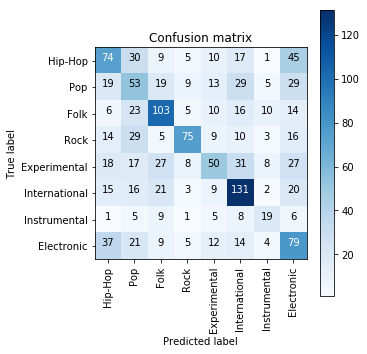

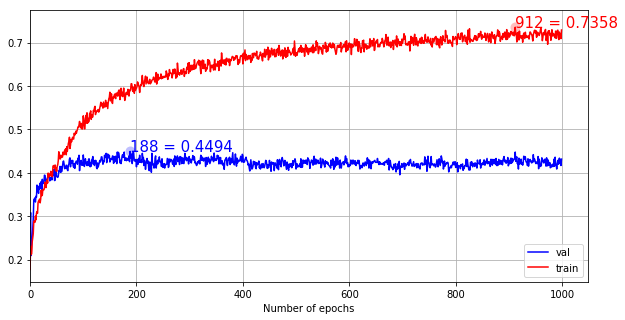

In [183]:
#run the model
runCNNmodel(x_train,y_trainHot,x_test,y_testHot,1000)
#plot learning curves across epochs
plotKerasLearningCurve()